# 1. Import Libraries and Load Data

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\archive (7)\ad_click_dataset.csv'  
ad_click_data = pd.read_csv(file_path)

# Preview the dataset
ad_click_data.info()
ad_click_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


# 2. Visualize Some Columns to understand data

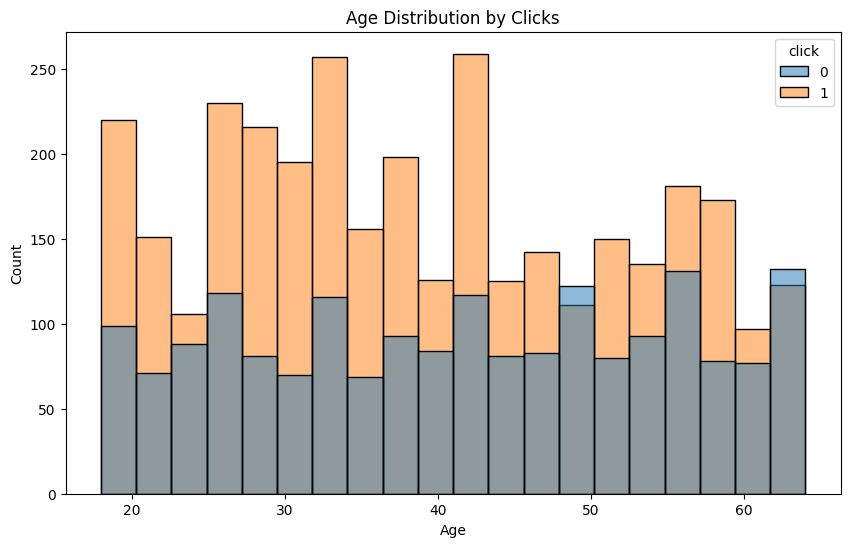

In [10]:
# Plot the age distribution for people who clicked and who didn't click
plt.figure(figsize=(10,6))
sns.histplot(data=ad_click_data, x='age', hue='click', bins=20)
plt.title("Age Distribution by Clicks")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


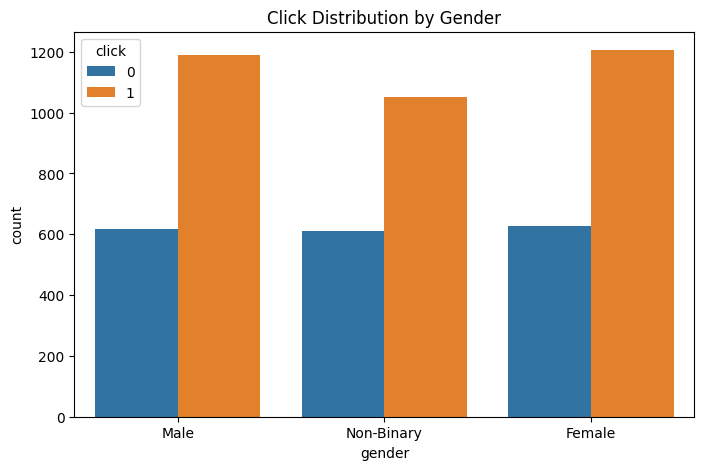

In [11]:
# Countplot to show the gender distribution
plt.figure(figsize=(8,5))
sns.countplot(data=ad_click_data, x='gender', hue='click')
plt.title("Click Distribution by Gender")
plt.show()


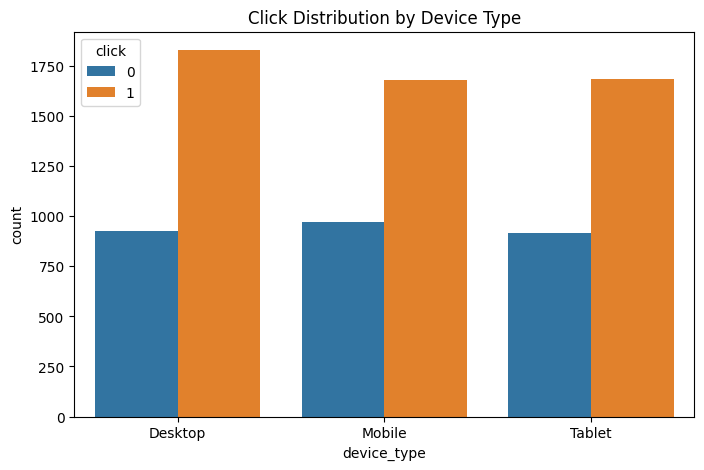

In [12]:
# Barplot showing device type vs clicks
plt.figure(figsize=(8,5))
sns.countplot(data=ad_click_data, x='device_type', hue='click')
plt.title("Click Distribution by Device Type")
plt.show()


# 3. Data Preprocessing


In [2]:
# Drop irrelevant columns
ad_click_data_cleaned = ad_click_data.drop(columns=["id", "full_name"])

# Handle missing values:
# Fill missing 'age' with the median
ad_click_data_cleaned['age'].fillna(ad_click_data_cleaned['age'].median(), inplace=True)

# Fill missing categorical columns with the most frequent value (mode)
categorical_columns = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
for column in categorical_columns:
    ad_click_data_cleaned[column].fillna(ad_click_data_cleaned[column].mode()[0], inplace=True)

# One-hot encode categorical columns
ad_click_data_encoded = pd.get_dummies(ad_click_data_cleaned, columns=categorical_columns, drop_first=True)


# 4. Split the Data into Training and Test Sets


In [3]:
# Define target and features
X = ad_click_data_encoded.drop(columns=['click'])
y = ad_click_data_encoded['click']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features (optional, can improve some models)
scaler = StandardScaler()
X_train[['age']] = scaler.fit_transform(X_train[['age']])
X_test[['age']] = scaler.transform(X_test[['age']])


# 5. Model Training (Random Forest)


In [4]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.714
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51       705
           1       0.74      0.87      0.80      1295

    accuracy                           0.71      2000
   macro avg       0.69      0.65      0.65      2000
weighted avg       0.70      0.71      0.70      2000

Confusion Matrix:
 [[ 298  407]
 [ 165 1130]]


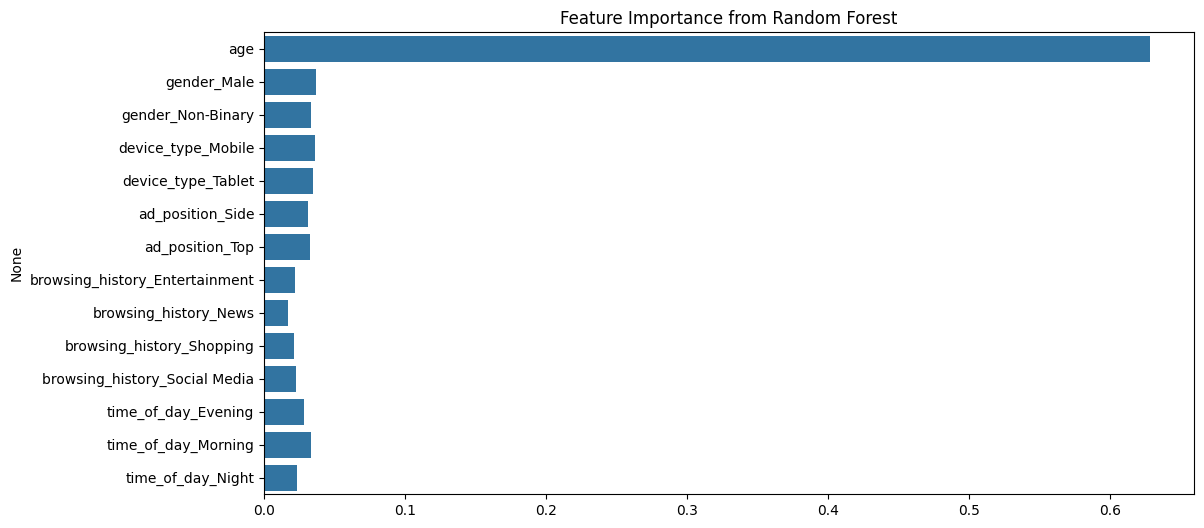

In [14]:
# Feature importance from the Random Forest model
importances = rf_classifier.feature_importances_
features = X.columns

# Create a bar plot for feature importances
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()


# 6. Hyperparameter Tuning with Cross-Validation


In [5]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Predict with the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the tuned model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Model Accuracy: 0.72
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.43      0.52       705
           1       0.74      0.88      0.80      1295

    accuracy                           0.72      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.71      0.72      0.70      2000



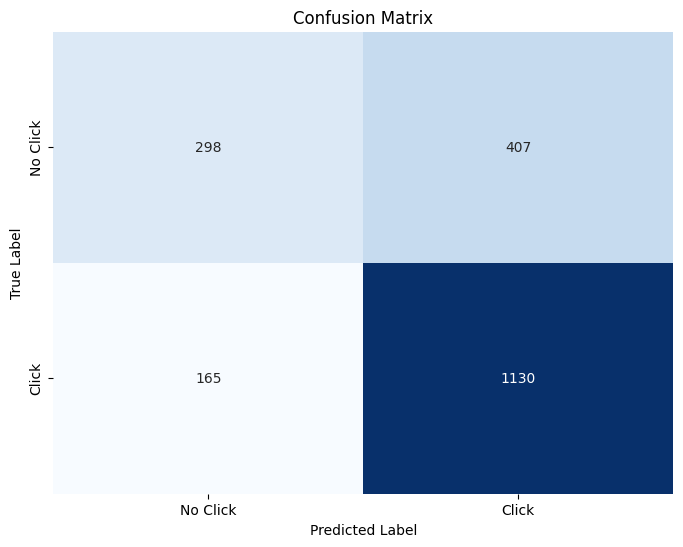

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Click", "Click"], yticklabels=["No Click", "Click"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Conclusion
The above code handles missing data, encodes categorical variables, trains a Random Forest classifier, and evaluates its performance.
You can adjust this by trying other models (Logistic Regression, SVM, etc.), further tuning hyperparameters, and analyzing feature importance for better accuracy.